In [1]:
#importing import library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as npatches
import numpy as np
import matplotlib.pyplot as plt
#my code
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM 
plt.style.use('fivethirtyeight')
# Import yfinance 
import yfinance as yf 

In [2]:

# Get the data for the stock tvsmotor by specifying the stock ticker, start date, and end date 
dataset = yf.download('M&M.NS','2002-07-01','2021-06-01') 

[*********************100%***********************]  1 of 1 completed


In [49]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-25,819.650024,828.0,808.349976,811.250000,811.250000,5044078
2021-05-26,816.000000,826.0,813.000000,821.200012,821.200012,3084558
2021-05-27,825.299988,831.0,816.900024,828.599976,828.599976,6902630
2021-05-28,829.000000,853.0,810.500000,845.849976,845.849976,11638455
2021-05-31,824.000000,824.0,790.000000,807.950012,807.950012,17596018


In [3]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,14.36250,14.65625,14.20625,14.55000,11.584423,6452928
2002-07-02,14.73750,14.93125,14.53750,14.58750,11.614279,7477224
2002-07-03,14.63750,14.65000,13.84375,14.18750,11.295808,5537424
2002-07-04,14.35625,14.50000,14.20000,14.36250,11.435142,4107544
2002-07-05,14.43125,14.75000,14.37500,14.61875,11.639159,5105288


In [5]:
#selecting required feature
data=dataset[["Close"]]

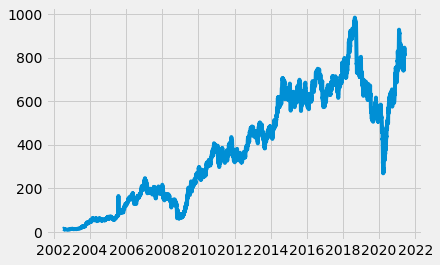

In [6]:
plt.plot(data)

In [7]:
#convering to array for model
data=data.to_numpy()

In [8]:
#function to create dependent and independent feature
def create_database(data,steps):
    data_X=[]
    data_y=[]
    for i in range(0,len(data)-steps-1):
        temp=data[i:(i+steps),0]
        data_X.append(temp)
        data_y.append(data[i+steps,0])
    return np.array(data_X),np.array(data_y)

In [9]:
#feature scaling and reshaping 2d array having one subarray
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

data=sc.fit_transform(data.reshape(-1,1))



In [10]:
time_stamp=100
X,y=create_database(data,time_stamp)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
X_test.shape

(919, 100)

In [13]:
X_train.shape

(3673, 100)

In [14]:
#reshaping to 3d for lstm model
X_train=X_train.reshape(len(X_train),100,1)
X_test=X_test.reshape(len(X_test),100,1)

In [15]:
import keras

In [16]:
from keras.layers import Dense,LSTM
from keras.models import Sequential,load_model
from keras.losses import mse

In [17]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(100,1),return_sequences=True))
model.add(LSTM(units=100,activation="relu",return_sequences=True))
model.add(LSTM(units=100,activation="relu"))
model.add(Dense(units=1,activation="relu"))
model.compile(optimizer="adam",loss="mse",metrics=["accuracy"])

In [18]:
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
115/115 [==============================] - 109s 459ms/step - loss: 0.0404 - accuracy: 2.4745e-04 - val_loss: 5.9829e-04 - val_accuracy: 0.0000e+00
Epoch 2/10
115/115 [==============================] - 49s 427ms/step - loss: 6.8802e-04 - accuracy: 7.1056e-05 - val_loss: 5.6594e-04 - val_accuracy: 0.0000e+00
Epoch 3/10
115/115 [==============================] - 49s 425ms/step - loss: 5.8343e-04 - accuracy: 2.5331e-04 - val_loss: 5.6775e-04 - val_accuracy: 0.0000e+00
Epoch 4/10
115/115 [==============================] - 48s 417ms/step - loss: 5.5432e-04 - accuracy: 5.0769e-05 - val_loss: 4.3323e-04 - val_accuracy: 0.0000e+00
Epoch 5/10
115/115 [==============================] - 49s 427ms/step - loss: 4.8359e-04 - accuracy: 2.1994e-04 - val_loss: 4.9596e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
115/115 [==============================] - 48s 418ms/step - loss: 5.1826e-04 - accuracy: 1.4274e-05 - val_loss: 3.8312e-04 - val_accuracy: 0.0000e+00
Epoch 7/10
115/115 [=================

In [19]:
y_pred=model.predict(X_test)

In [20]:
y_pred=sc.inverse_transform(y_pred)

In [21]:
#predicted value
y_pred

array([[332.8229   ],
       [ 30.033012 ],
       [ 35.425903 ],
       [ 54.010796 ],
       [400.41     ],
       [ 86.08414  ],
       [608.0602   ],
       [653.7171   ],
       [568.638    ],
       [ 52.713463 ],
       [735.96533  ],
       [700.6307   ],
       [ 33.506863 ],
       [ 31.579084 ],
       [680.783    ],
       [450.91882  ],
       [737.6564   ],
       [674.9715   ],
       [ 11.205458 ],
       [642.8999   ],
       [685.00385  ],
       [ 19.67284  ],
       [535.87646  ],
       [162.14087  ],
       [ 54.41669  ],
       [350.85367  ],
       [361.23886  ],
       [ 95.309296 ],
       [ 85.80406  ],
       [738.9836   ],
       [182.56538  ],
       [ 55.643368 ],
       [367.74527  ],
       [329.00125  ],
       [215.7237   ],
       [643.8234   ],
       [195.48637  ],
       [ 60.605    ],
       [608.5677   ],
       [179.21426  ],
       [370.82037  ],
       [904.77423  ],
       [634.9511   ],
       [754.26416  ],
       [184.97672  ],
       [61

In [22]:
#actual value
sc.inverse_transform(y_test.reshape(-1,1))

array([[344.3500061 ],
       [ 36.34375   ],
       [ 35.64374924],
       [ 61.38124847],
       [391.625     ],
       [ 86.34999847],
       [604.15002441],
       [647.5       ],
       [577.75      ],
       [ 55.65625   ],
       [717.95001221],
       [697.95001221],
       [ 38.60625076],
       [ 35.6875    ],
       [688.97497559],
       [449.6000061 ],
       [732.54998779],
       [653.40002441],
       [ 13.54374981],
       [615.79998779],
       [688.97497559],
       [ 23.13125038],
       [564.875     ],
       [161.        ],
       [ 54.53749847],
       [337.6499939 ],
       [359.125     ],
       [ 91.40000153],
       [ 86.07499695],
       [717.84997559],
       [187.69999695],
       [ 55.8125    ],
       [338.0249939 ],
       [320.54998779],
       [212.4750061 ],
       [646.95001221],
       [196.2124939 ],
       [ 62.60625076],
       [591.95001221],
       [182.38749695],
       [361.75      ],
       [894.20001221],
       [627.82501221],
       [712

In [23]:
data.shape

(4693, 1)

In [29]:
#predicting 100 future value
from numpy import array
x_dataset=data[4593:len(data),:].reshape(1,-1)

In [48]:
x_dataset

array([[0.74186265, 0.75895882, 0.74971762, 0.74561043, 0.75413291,
        0.78093235, 0.8000308 , 0.7905329 , 0.84033268, 0.84192427,
        0.83139957, 0.82046413, 0.81948866, 0.83637953, 0.81969403,
        0.80958008, 0.80562687, 0.78036763, 0.77528496, 0.75947222,
        0.80624299, 0.82852448, 0.84531269, 0.8795051 , 0.87847831,
        0.94306402, 0.90876889, 0.92843213, 0.92848345, 0.92268201,
        0.92607044, 0.92642985, 0.92925355, 0.90820416, 0.8925968 ,
        0.84931717, 0.85327039, 0.86215217, 0.87180411, 0.81779448,
        0.8311942 , 0.87288224, 0.86466784, 0.85768562, 0.85270566,
        0.86358971, 0.86461651, 0.87673273, 0.86851834, 0.85681286,
        0.85522127, 0.84916319, 0.85809636, 0.86287094, 0.86569464,
        0.85706956, 0.82292848, 0.80270052, 0.81055549, 0.80608894,
        0.80634564, 0.81902659, 0.78498822, 0.7918164 , 0.80742377,
        0.80624299, 0.80213579, 0.76142316, 0.82277443, 0.81645959,
        0.83345317, 0.80603761, 0.82267178, 0.81

In [31]:
x_dataset.shape

(1, 100)

In [32]:
future_dataset=x_dataset[0].tolist()

In [33]:
#prediction
future_pred=[]
for i in range(100):
    if(len(future_dataset)>100):
        temp=np.array(future_dataset[1:]).reshape(1,-1)
        pred=model.predict(temp.reshape(1,100,1),verbose=0)
        future_dataset.extend(np.array(pred[0]))
        future_dataset=future_dataset[1:]
        future_pred.extend(pred[0])
    else:
        temp=x_dataset.reshape(1,100,1)
        pred=model.predict(temp)
        future_dataset.extend(np.array(pred[0]))
        future_pred.extend(pred[0])
        

In [34]:
prediction=sc.inverse_transform(np.array(future_pred).reshape(-1,1))

In [35]:
prediction

array([[ 833.58374],
       [ 831.78076],
       [ 830.7913 ],
       [ 830.40704],
       [ 830.2864 ],
       [ 830.3099 ],
       [ 830.5068 ],
       [ 830.9481 ],
       [ 831.6934 ],
       [ 832.77454],
       [ 834.19745],
       [ 835.9451 ],
       [ 837.9858 ],
       [ 840.28656],
       [ 842.79517],
       [ 845.4561 ],
       [ 848.21436],
       [ 851.0174 ],
       [ 853.8172 ],
       [ 856.5728 ],
       [ 859.25024],
       [ 861.8251 ],
       [ 864.2817 ],
       [ 866.6125 ],
       [ 868.8182 ],
       [ 870.90576],
       [ 872.9073 ],
       [ 874.8435 ],
       [ 876.73676],
       [ 878.612  ],
       [ 880.49335],
       [ 882.4033 ],
       [ 884.3612 ],
       [ 886.3821 ],
       [ 888.4774 ],
       [ 890.655  ],
       [ 892.9177 ],
       [ 895.2657 ],
       [ 897.6962 ],
       [ 900.2037 ],
       [ 902.78143],
       [ 905.4214 ],
       [ 908.11536],
       [ 910.85535],
       [ 913.63403],
       [ 916.44495],
       [ 919.28345],
       [ 922.

In [46]:
prev_day=np.arange(1,4694)
pred_day=np.arange(4693,4793)

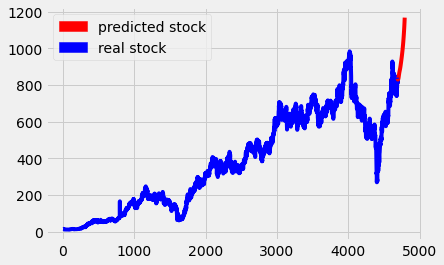

In [47]:
plt.plot(prev_day,sc.inverse_transform(data),color='blue')
plt.plot(pred_day,prediction,color='red')
blue_pach=npatches.Patch(color='blue',label="real stock")
red_patch=npatches.Patch(color='red',label="predicted stock")
plt.grid(True)
plt.legend(handles=[red_patch,blue_pach])
plt.show()